In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [2]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2023-09-06 08:40:34--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.50.124.196, 2600:1408:5400:391::317f, 2600:1408:5400:398::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.50.124.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.67M  69.0MB/s    in 8.2s    

2023-09-06 08:40:42 (96.4 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824887076/824887076]



In [3]:
source_path = '/tmp/PetImages'

source_path_dogs = os.path.join(source_path, 'Dog')
source_path_cats = os.path.join(source_path, 'Cat')

# Deletes all non-image files (there are two .db files bundled into the dataset)
!find /tmp/PetImages/ -type f ! -name "*.jpg" -exec rm {} +

# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")

There are 12500 images of dogs.
There are 12500 images of cats.


In [4]:
root_dir = '/content/cats-v-dogs'

if os.path.exists(root_dir):
  shutil.rmtree(root_dir)


def create_train_val_dirs(root_path):

  train_dir = os.path.join(root_dir, 'training')
  validation_dir = os.path.join(root_dir, 'validation')

  train_cats_dir = os.path.join(train_dir, 'cats')
  train_dogs_dir = os.path.join(train_dir, 'dogs')

  validation_cats_dir = os.path.join(validation_dir, 'cats')
  validation_dogs_dir = os.path.join(validation_dir, 'dogs')

  os.makedirs(train_dir)
  os.makedirs(validation_dir)

  os.makedirs(train_cats_dir)
  os.makedirs(train_dogs_dir)

  os.makedirs(validation_cats_dir)
  os.makedirs(validation_dogs_dir)

try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [5]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/content/cats-v-dogs/training
/content/cats-v-dogs/validation
/content/cats-v-dogs/training/cats
/content/cats-v-dogs/training/dogs
/content/cats-v-dogs/validation/cats
/content/cats-v-dogs/validation/dogs


In [6]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  shuffled_list = random.sample(os.listdir(SOURCE_DIR), int(len(os.listdir(SOURCE_DIR)) * SPLIT_SIZE))
  for file_name in os.listdir(SOURCE_DIR):
    if os.path.getsize(os.path.join(SOURCE_DIR, file_name)) > 0:
          if file_name in shuffled_list:
            copyfile(os.path.join(SOURCE_DIR, file_name), os.path.join(TRAINING_DIR, file_name))
          else:
            copyfile(os.path.join(SOURCE_DIR, file_name), os.path.join(VALIDATION_DIR, file_name))
    else :
      print(f"{file_name} is zero length, so ignoring.")

In [7]:
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"

TRAINING_DIR = "/content/cats-v-dogs/training/"
VALIDATION_DIR = "/content/cats-v-dogs/validation/"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
VALIDATION_CATS_DIR = os.path.join(VALIDATION_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
VALIDATION_DOGS_DIR = os.path.join(VALIDATION_DIR, "dogs/")


if len(os.listdir(TRAINING_CATS_DIR)) > 0:
  for file in os.scandir(TRAINING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
  for file in os.scandir(TRAINING_DOGS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_CATS_DIR)) > 0:
  for file in os.scandir(VALIDATION_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_DOGS_DIR)) > 0:
  for file in os.scandir(VALIDATION_DOGS_DIR):
    os.remove(file.path)


split_size = .9


split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, VALIDATION_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, VALIDATION_DOGS_DIR, split_size)


print(f"\n\nOriginal cat's directory has {len(os.listdir(CAT_SOURCE_DIR))} images")
print(f"Original dog's directory has {len(os.listdir(DOG_SOURCE_DIR))} images\n")


print(f"There are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(VALIDATION_CATS_DIR))} images of cats for validation")
print(f"There are {len(os.listdir(VALIDATION_DOGS_DIR))} images of dogs for validation")

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


Original cat's directory has 12500 images
Original dog's directory has 12500 images

There are 11249 images of cats for training
There are 11249 images of dogs for training
There are 1250 images of cats for validation
There are 1250 images of dogs for validation


In [8]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  train_datagen = ImageDataGenerator(rescale = 1.0/255.)


  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

  validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='binary',
                                                                target_size=(150, 150))
  return train_generator, validation_generator

In [9]:
def create_model():
  model = tf.keras.models.Sequential([
       tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
  ])


  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

In [10]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [11]:
model = create_model()

history = model.fit(train_generator,
                    epochs=10,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/10
618/704 [=========================>....] - ETA: 1:21 - loss: 0.6109 - accuracy: 0.6624

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


704/704 [==============================] - 709s 1s/step - loss: 0.5992 - accuracy: 0.6729 - val_loss: 0.5154 - val_accuracy: 0.7396
Epoch 2/10
704/704 [==============================] - 703s 999ms/step - loss: 0.4674 - accuracy: 0.7786 - val_loss: 0.4925 - val_accuracy: 0.7588
Epoch 3/10
704/704 [==============================] - 695s 987ms/step - loss: 0.3973 - accuracy: 0.8164 - val_loss: 0.4148 - val_accuracy: 0.8024
Epoch 4/10
704/704 [==============================] - 696s 989ms/step - loss: 0.3287 - accuracy: 0.8557 - val_loss: 0.3918 - val_accuracy: 0.8224
Epoch 5/10
704/704 [==============================] - 712s 1s/step - loss: 0.2448 - accuracy: 0.8967 - val_loss: 0.4542 - val_accuracy: 0.8140
Epoch 6/10
704/704 [==============================] - 692s 983ms/step - loss: 0.1523 - accuracy: 0.9396 - val_loss: 0.4822 - val_accuracy: 0.8224
Epoch 7/10
704/704 [==============================] - 694s 986ms/step - loss: 0.0779 - accuracy: 0.9732 - val_loss: 0.6442 - val_accuracy: 0.

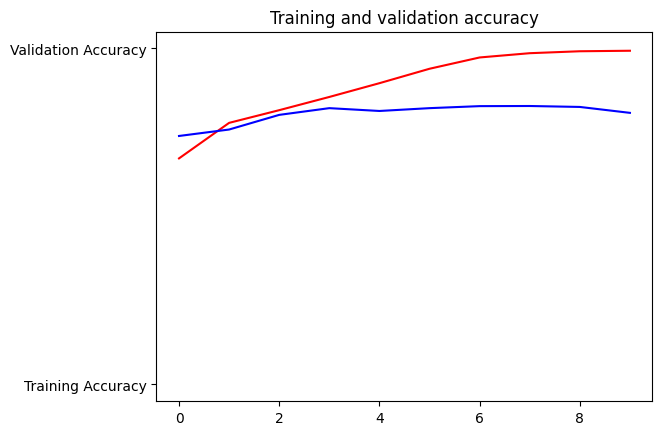

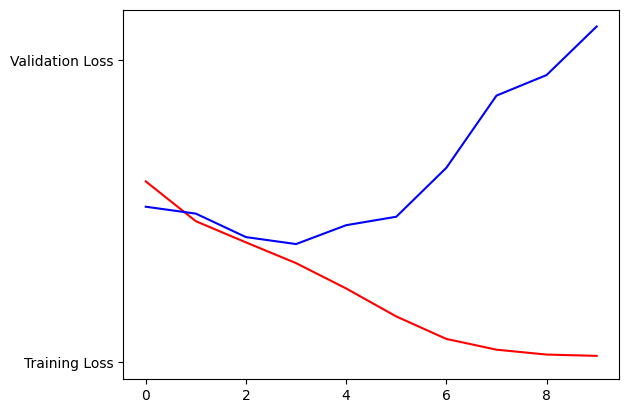

In [12]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()